
## RNNs for Stock Price Prediction


##### Dataset : Gooogle Stock Price (Kaggle)

#### Import Libraries

In [1]:
# load all the necesary libraries

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# datetime
import datetime

# NumPy
import numpy as np

# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

### Data Pre-Processing




*   **Train Dataset**

In [23]:
# read the train dataset into dataframe
df = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')
# df = pd.read_csv('/Google_Stock_Price_Train.csv')

df
#df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"




*   Date - the date of which day the values are given for in a row
*   Open - the stock open value of the day
*   High - the highest value of stock for the day
*   Low - the lowest value of stock for the day
*   Close - the stock close value of the day
*   Volume - the volume of stocks traded on that day

In [24]:
# see the shape of the dataframe
df.shape

(1258, 6)

Here, we can see that the dataset has 6 variables and there is no output column (Outcome). We are going to build a model to predict the price of stock through the given 6 variables (input) and by analysing it.

In [25]:
# check for any missing values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


We can notice that there is no missing values.

In [26]:
# use the column of date and the column of closing value on that day
df_train = df[['Date', 'Close']]  # other columns are discarded

df_train

,Date,Close
0,1/3/2012,663.59
1,1/4/2012,666.45
2,1/5/2012,657.21
3,1/6/2012,648.24
4,1/9/2012,620.76
...,...,...
1253,12/23/2016,789.91
1254,12/27/2016,791.55
1255,12/28/2016,785.05
1256,12/29/2016,782.79


In [27]:
# the date column has the dates as string
# need to change the date values from string to date object
df_train['Date']

,Date
0,1/3/2012
1,1/4/2012
2,1/5/2012
3,1/6/2012
4,1/9/2012
...,...
1253,12/23/2016
1254,12/27/2016
1255,12/28/2016
1256,12/29/2016


In [28]:
# define function
# change string to datetime object

def string_to_datetime(s):

  # s ------> string and should be in format: month/day/year

  split = s.split('/')    # seperator : '/'
  month, day, year = int(split[0]), int(split[1]), int(split[2])

  return datetime.datetime(year=year, month=month, day=day)

In [29]:
# example to check the function
datetime_object = string_to_datetime('12/5/2024')
datetime_object

# datetime.datetime(year, month, date, time, time)

datetime.datetime(2024, 12, 5, 0, 0)

In [30]:
# change all date string type values to datetime objects of df_train
df_train['Date'] = df_train['Date'].apply(string_to_datetime)
df_train['Date']

<ipython-input-30-f96fe8059d51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Date'] = df_train['Date'].apply(string_to_datetime)


,Date
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09
...,...
1253,2016-12-23
1254,2016-12-27
1255,2016-12-28
1256,2016-12-29


In [31]:
# df_exp = df.copy()

# df_exp['Date'] = df_exp['Date'].apply(string_to_datetime)
# df_exp['Date']

# # set the date as the index of df_train data
# df_exp.index = df_exp.pop('Date')
# df_exp

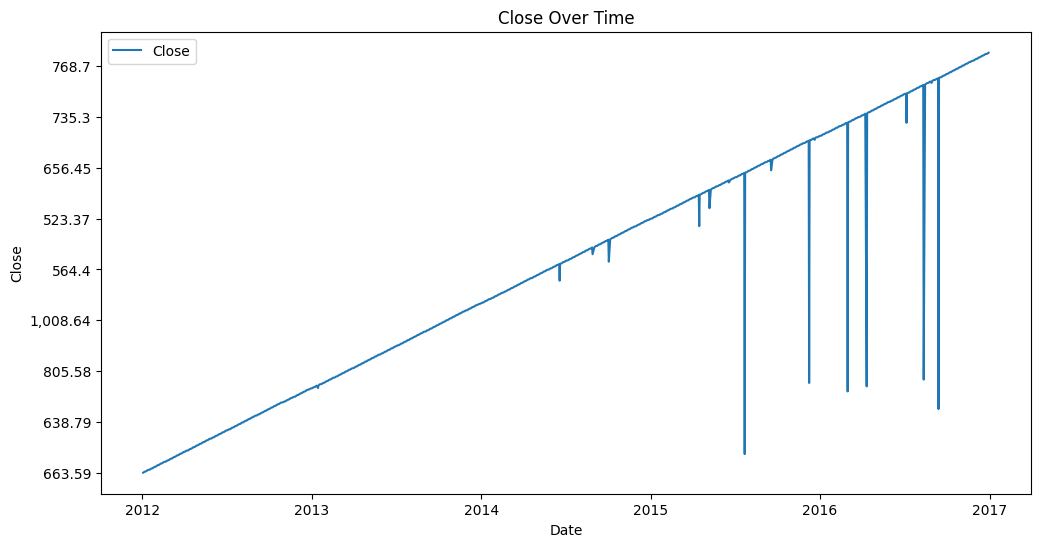

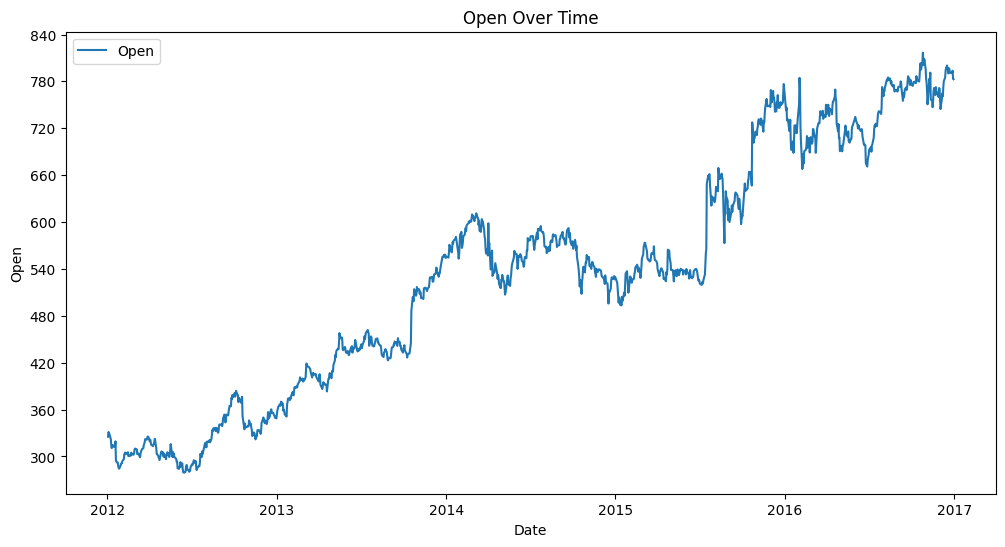

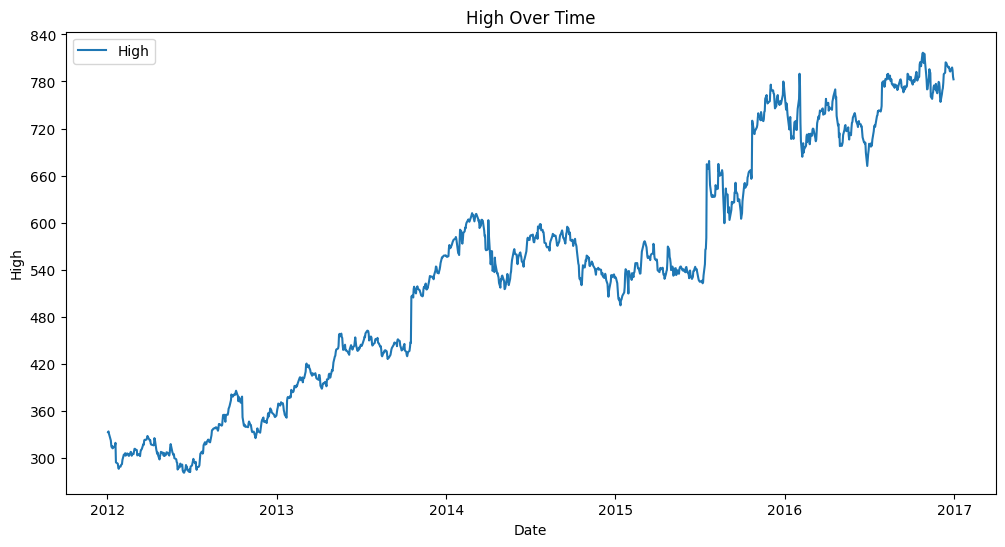

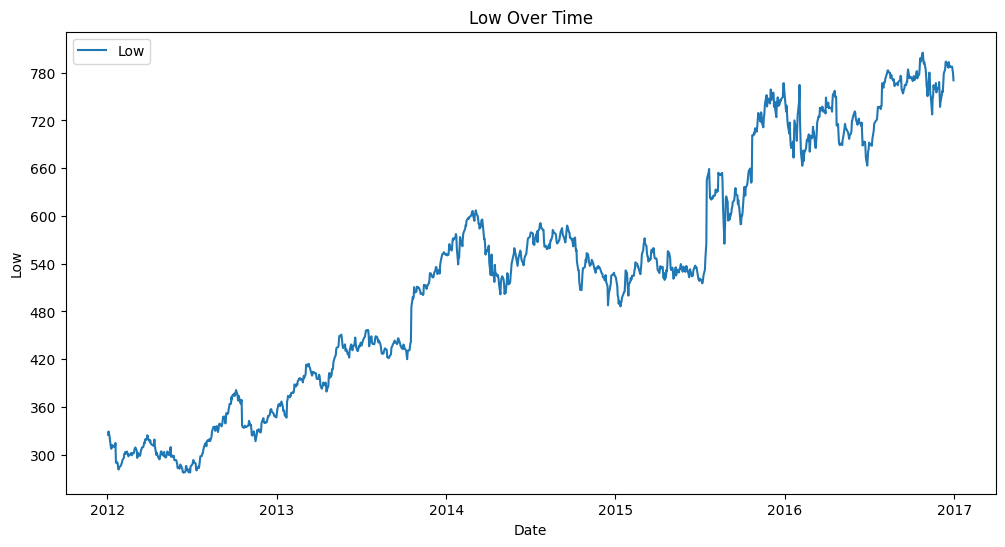

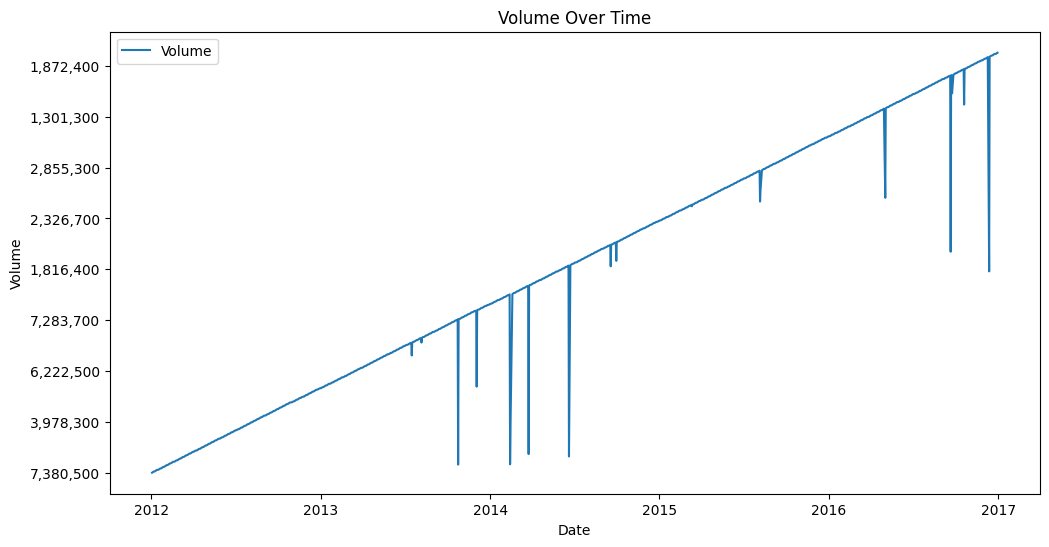

In [32]:
# plot our data of df_train
columns_to_plot = ['Close', 'Open', 'High', 'Low', 'Volume']

# loop through the columns
# create a plot for each
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))  # a new figure for each column
    plt.plot(df_exp.index, df_exp[column], label=column)
    plt.title(f'{column} Over Time')  # setting the title of the plot
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(10))  # setting the max ticks for y-axis
    plt.show()

In [33]:
# set the date as the index of df_train data
df_train.index = df_train.pop('Date')
df_train

,Close
Date,
2012-01-03,663.59
2012-01-04,666.45
2012-01-05,657.21
2012-01-06,648.24
2012-01-09,620.76
...,...
2016-12-23,789.91
2016-12-27,791.55
2016-12-28,785.05


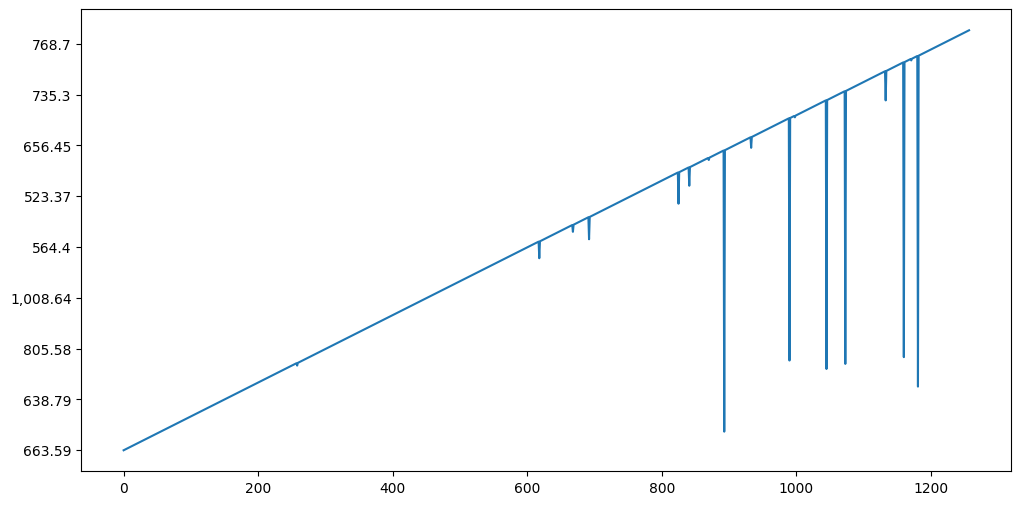

In [34]:
# plot our data of df_train
plt.figure(figsize=(12, 6))  # adjust width and height as needed
plt.plot(df.index, df['Close'])

# set a maximum of 10 ticks on the y-axis
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(10))

plt.show()

In [35]:
# visualise the stock closing prices
df_close = df.reset_index()['Close']
df_close

,Close
0,663.59
1,666.45
2,657.21
3,648.24
4,620.76
...,...
1253,789.91
1254,791.55
1255,785.05
1256,782.79


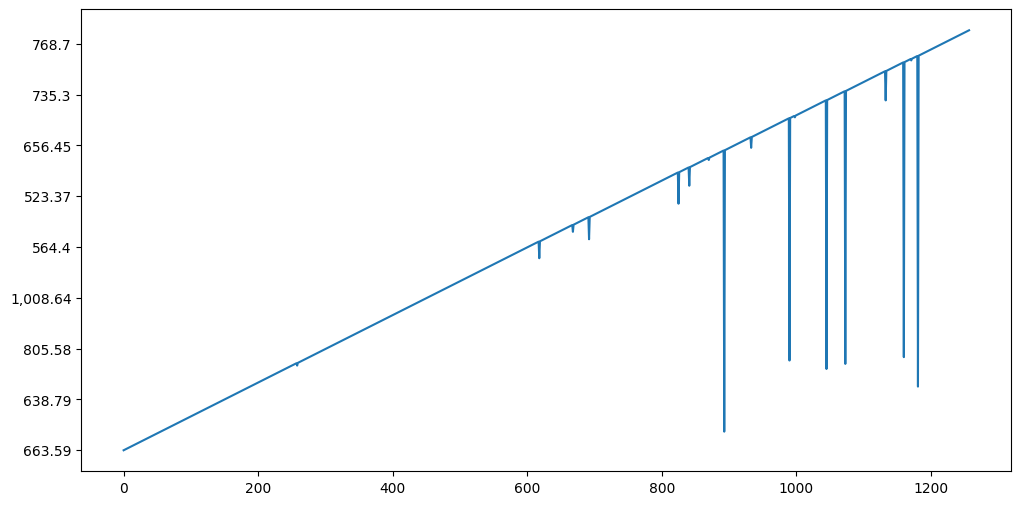

In [36]:
# visualise the stock closing prices
plt.figure(figsize=(12, 6))  # adjust width and height as needed
plt.plot(df_close)

# Set a maximum of 10 ticks on the y-axis
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(10))

*   **Test Dataset**

In [37]:
# read the test dataset into dataframe
df2 = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')
df2
#df2.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [38]:
# see the shape of the dataframe
df2.shape

(20, 6)

In [39]:
# check for any missing values
df2.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [40]:
# use the column of date and the column of closing value on that day
df_test = df2[['Date', 'Close']]  # other columns are discarded
df_test

,Date,Close
0,1/3/2017,786.14
1,1/4/2017,786.90
2,1/5/2017,794.02
3,1/6/2017,806.15
4,1/9/2017,806.65
5,1/10/2017,804.79
6,1/11/2017,807.91
7,1/12/2017,806.36
8,1/13/2017,807.88
9,1/17/2017,804.61


In [41]:
# change all date string type values to datetime objects of df_test
df_test['Date'] = df_test['Date'].apply(string_to_datetime)
df_test['Date']

<ipython-input-41-2804885867bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Date'] = df_test['Date'].apply(string_to_datetime)


,Date
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
5,2017-01-10
6,2017-01-11
7,2017-01-12
8,2017-01-13
9,2017-01-17


In [42]:
# set the date as the index of df_test data
df_test.index = df_test.pop('Date')
df_test

,Close
Date,
2017-01-03,786.14
2017-01-04,786.90
2017-01-05,794.02
2017-01-06,806.15
2017-01-09,806.65
2017-01-10,804.79
2017-01-11,807.91
2017-01-12,806.36
2017-01-13,807.88


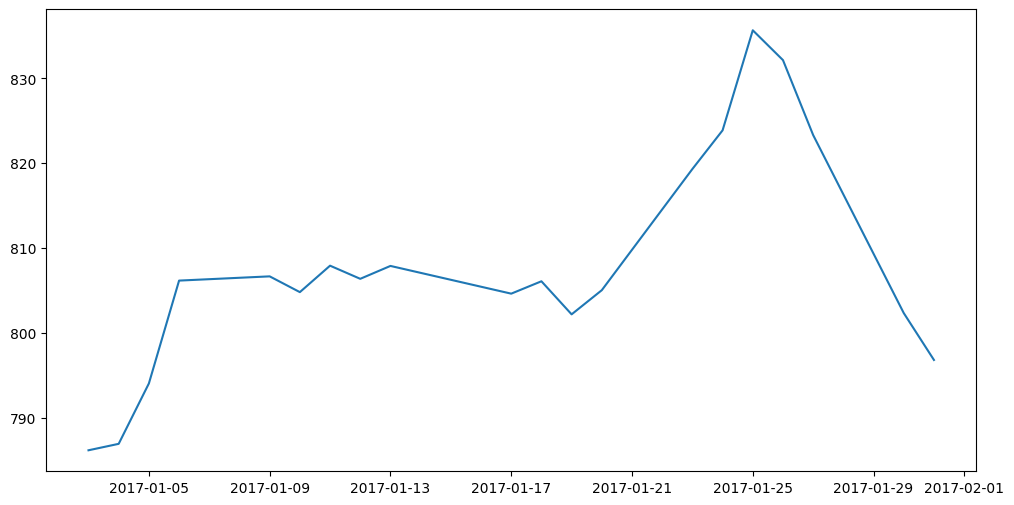

In [43]:
# plot our data of df_test
plt.figure(figsize=(12, 6))  # adjust width and height as needed
plt.plot(df_test.index, df_test['Close'])

# set a maximum of 10 ticks on the y-axis
# plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(10))
# plt.show()

In [24]:
# using lstm model
# need to convert to supervised learning problem

In [44]:
# define function
# convert the given dataframe to windowed dataframe

def to_windowed_df(dataframe, first_day, last_day, n=3):
  # first_date, last_date : strings

  first_date = string_to_datetime(first_day)
  last_date  = string_to_datetime(last_day)

  target_date = first_date

  dates = []
  X, Y = [], []


  last_time = False


  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)


    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_string = str(next_week.head(2).tail(1).index.values[0])
    next_date_string = next_datetime_string.split('T')[0]
    year_month_day = next_date_string.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time: # if true, then break the loop
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  temp_df = pd.DataFrame({})
  temp_df['Target Date'] = dates


  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    temp_df[f'Target-{n-i}'] = X[:, i]

  temp_df['Target'] = Y

  return temp_df

In [45]:
# example of testing the to_windowed_df() function

# 1/6/2012
# 12/30/2016

# shows the values of previous 3 days' closing values for each date
windowed_df_train = to_windowed_df(df_train, '1/6/2012', '12/30/2016', n=3)
windowed_df_train

,Target Date,Target-3,Target-2,Target-1,Target
0,2012-01-06,663.59,666.45,657.21,648.24
1,2012-01-09,666.45,657.21,648.24,620.76
2,2012-01-10,657.21,648.24,620.76,621.43
3,2012-01-11,648.24,620.76,621.43,624.25
4,2012-01-12,620.76,621.43,624.25,627.92
...,...,...,...,...,...
1250,2016-12-23,796.42,794.56,791.26,789.91
1251,2016-12-27,794.56,791.26,789.91,791.55
1252,2016-12-28,791.26,789.91,791.55,785.05
1253,2016-12-29,789.91,791.55,785.05,782.79


In [51]:
# example of testing the to_windowed_df() function

# 1/6/2017
# 1/31/2017

# shows the values of previous 3 days' closing values for each date
windowed_df_test = to_windowed_df(df_test, '1/6/2017', '1/31/2017', n=3)
windowed_df_test

,Target Date,Target-3,Target-2,Target-1,Target
0,2017-01-06,786.14,786.90,794.02,806.15
1,2017-01-09,786.90,794.02,806.15,806.65
2,2017-01-10,794.02,806.15,806.65,804.79
3,2017-01-11,806.15,806.65,804.79,807.91
4,2017-01-12,806.65,804.79,807.91,806.36
5,2017-01-13,804.79,807.91,806.36,807.88
6,2017-01-17,807.91,806.36,807.88,804.61
7,2017-01-18,806.36,807.88,804.61,806.07
8,2017-01-19,807.88,804.61,806.07,802.17
9,2017-01-20,804.61,806.07,802.17,805.02


In [46]:
# # define function
# # convert the given dataframe to windowed dataframe

# def to_windowed_df(dataframe, first_day, last_day, n=3, target_columns=['Close', 'Open', 'High', 'Low', 'Volume']):  # Updated target_columns
#   # first_date, last_date : strings

#   first_date = string_to_datetime(first_day)
#   last_date  = string_to_datetime(last_day)

#   target_date = first_date

#   dates = []
#   X, Y = [], []


#   last_time = False


#   while True:
#     df_subset = dataframe.loc[:target_date].tail(n+1)

#     if len(df_subset) != n+1:
#       print(f'Error: Window of size {n} is too large for date {target_date}')
#       return

#     # Get values for all columns (except 'Date' if it's still there)
#     values = df_subset.drop(columns=['Date'], errors='ignore').to_numpy()
#     x = values[:-1]  # Input features (all columns except 'Date')

#     # Get target values for specified columns
#     y = df_subset.loc[target_date][target_columns].to_numpy()

#     # values = df_subset['Close'].to_numpy()
#     # x, y = values[:-1], values[-1]

#     dates.append(target_date)
#     X.append(x)
#     Y.append(y)


#     next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
#     next_datetime_string = str(next_week.head(2).tail(1).index.values[0])
#     next_date_string = next_datetime_string.split('T')[0]
#     year_month_day = next_date_string.split('-')
#     year, month, day = year_month_day
#     next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

#     if last_time: # if true, then break the loop
#       break

#     target_date = next_date

#     if target_date == last_date:
#       last_time = True

#   temp_df = pd.DataFrame({})
#   temp_df['Target Date'] = dates

#   # Reshape X to have the correct dimensions for multiple features
#   num_features = X[0].shape[1]  # Number of features (columns)
#   X = np.array(X).reshape(len(dates), n, num_features)

#  # Create columns for input features (Target-3, Target-2, Target-1, etc.)
#   for i in range(0, n):
#     for j in range(num_features):
#         feature_name = dataframe.columns[j]  # Get original feature name
#         temp_df[f'{feature_name}_Target-{n - i}'] = X[:, i, j]  # Use original feature name


#  # Create columns for target prices
#   for i, col_name in enumerate(target_columns):
#     temp_df[f'Target_{col_name}'] = [row[i] for row in Y]  # Updated column names


#   # X = np.array(X)
#   # for i in range(0, n):
#   #   X[:, i]
#   #   temp_df[f'Target-{n-i}'] = X[:, i]

#   # temp_df['Target'] = Y

#   return temp_df

In [47]:
# windowed_df_train = to_windowed_df(df_exp, '1/6/2012', '12/30/2016', n=3)

# # # accessing target prices:
# # target_close = windowed_df_train['Target_Close']
# # target_open = windowed_df_train['Target_Open']
# # target_low = windowed_df_train['Target_Low']
# # target_high = windowed_df_train['Target_High']


# # print(windowed_df_train)
# windowed_df_train

*   Target Date - the specific date
*   Target-3 - the closing value of 3 days ago of the target date
*   Target-2 - the closing value of 2 days ago of the target date
*   Target-1 - the closing value of previous date of the target date
*   Target - the closing value of the target date


In [52]:
# define function
# converts windowed dataframe to dates, input matrix X (3D tensor) and output vector y

def to_dates_X_y(windowed_dataframe):
  # Convert relevant columns to numeric, handling commas
  for col in windowed_dataframe.columns[1:]:  # Skip 'Target Date' column
    if windowed_dataframe[col].dtype == object:  # Check if column is of type object (string)
      windowed_dataframe[col] = windowed_dataframe[col].str.replace(',', '').astype(float)  # Remove commas and convert to float

  np_array = windowed_dataframe.to_numpy()

  dates = np_array[:, 0]

  middle_matrix = np_array[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = np_array[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

In [53]:
# use the function
dates, X, y = to_dates_X_y(windowed_df_train)

dates.shape, X.shape, y.shape
# # use the function
# dates, X, y = to_dates_X_y(windowed_df_train)

# # dates will contain the dates
# # X - 3D matrix with open, close, high, low, volume features from previous days
# # y - 2D matrix with target open, close, high, low, volume for the target date

# dates.shape, X.shape, y.shape

((1255,), (1255, 3, 1), (1255,))

In [54]:
# use the function
dates2, X2, y2 = to_dates_X_y(windowed_df_test)

dates2.shape, X2.shape, y2.shape

((17,), (17, 3, 1), (17,))

In [57]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

print(q_80, q_90)
print(dates[:q_80])
print(X[:q_80])
print(y[:q_80])

1004 1129
[Timestamp('2012-01-06 00:00:00') Timestamp('2012-01-09 00:00:00')
 Timestamp('2012-01-10 00:00:00') ... Timestamp('2015-12-30 00:00:00')
 Timestamp('2015-12-31 00:00:00') Timestamp('2016-01-04 00:00:00')]
[[[663.59]
  [666.45]
  [657.21]]

 [[666.45]
  [657.21]
  [648.24]]

 [[657.21]
  [648.24]
  [620.76]]

 ...

 [[748.4 ]
  [762.51]
  [776.6 ]]

 [[762.51]
  [776.6 ]
  [771.  ]]

 [[776.6 ]
  [771.  ]
  [758.88]]]
[648.24 620.76 621.43 ... 771.   758.88 741.84]


### Split Train, validation and Test Data

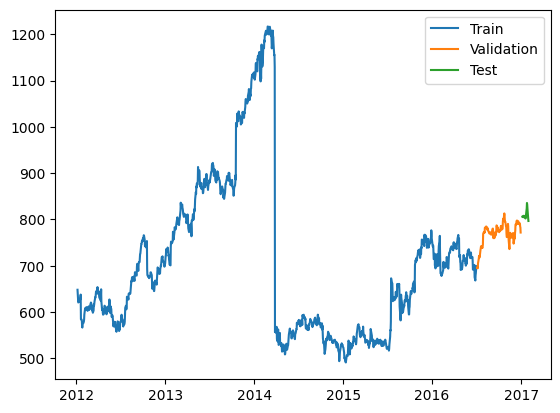

In [57]:
# q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9) # 90 percent for training and 10 % for validation

dates_train, X_train, y_train = dates[:q_90], X[:q_90], y[:q_90]
dates_val, X_val, y_val = dates[q_90:], X[q_90:], y[q_90:]

dates_test, X_test, y_test = dates2[:], X2[:], y2[:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)


plt.legend(['Train', 'Validation', 'Test'])

### Data Modeling

In [58]:
# training the LSTM model
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 523712.4062 - mean_absolute_error: 702.4042 - val_loss: 587948.5625 - val_mean_absolute_error: 766.4352
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 524432.9375 - mean_absolute_error: 703.3754 - val_loss: 574843.8750 - val_mean_absolute_error: 757.8382
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 516675.6562 - mean_absolute_error: 696.9365 - val_loss: 546536.8750 - val_mean_absolute_error: 738.9260
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 477659.9062 - mean_absolute_error: 668.7313 - val_loss: 494355.9375 - val_mean_absolute_error: 702.7307
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 411867.6875 - mean_absolute_error: 619.1135 - val_loss: 411724.4062 - val_mean_absolute_error: 641.2481
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 340568.5938 - mean_absolute_error: 558.7547 - val_loss: 309674.3438 - val_mean_absolute_error: 556.0117
Epoch 7/100
36/36 ━━━

### LSTM Model Forecasting (Stock Predictions)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


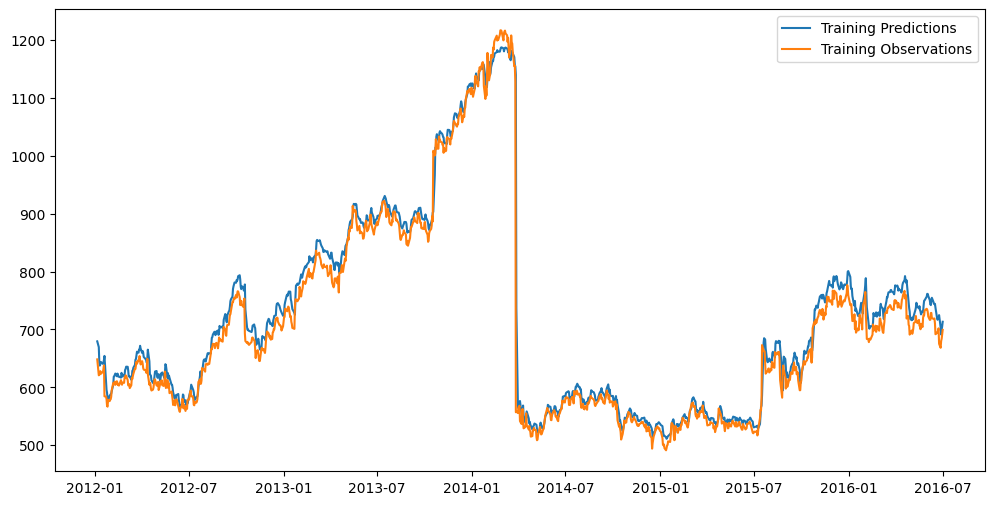

In [59]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(12, 6))

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


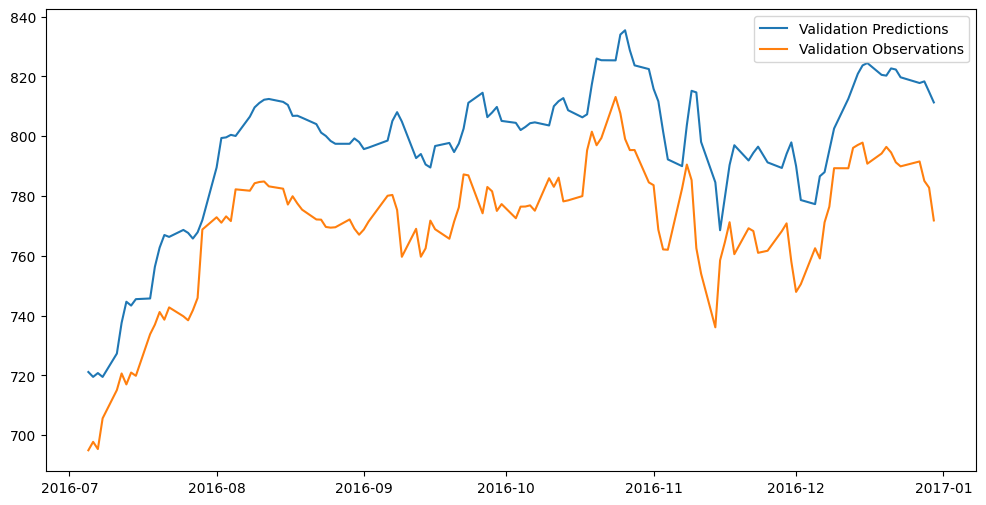

In [60]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(12, 6))

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


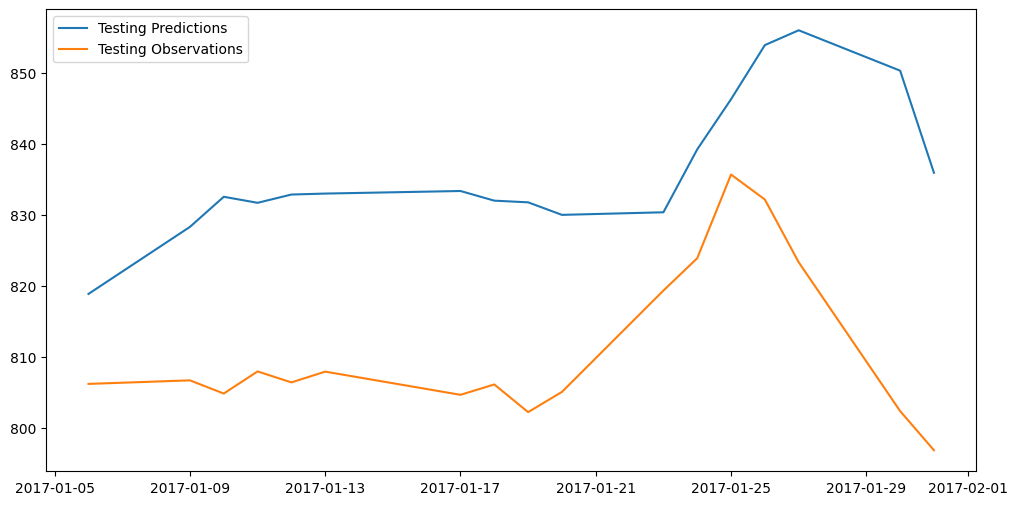

In [61]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(12, 6))

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

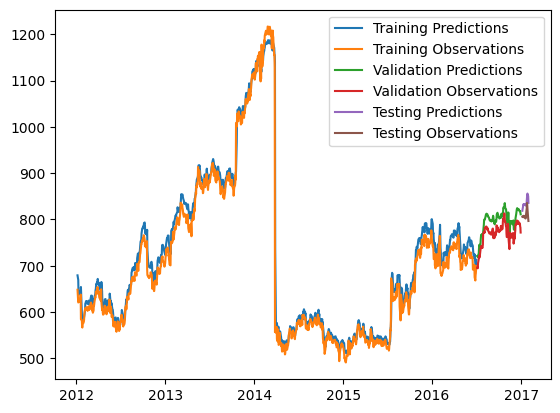

In [62]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [63]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

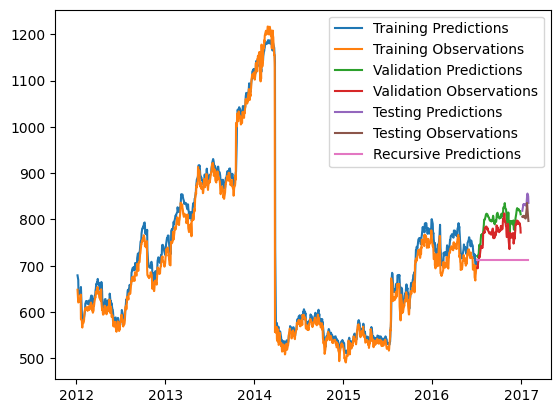

In [64]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])